In [2]:
from google.colab import files
uploaded = files.upload()


Saving unicef_cleaned.csv to unicef_cleaned.csv


In [4]:
# Install libraries (in case not installed)
!pip install plotly

# Import Libraries
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('unicef_cleaned.csv')

# -------------------------------
# 1. World Map Chart: Life Expectancy (2020)
# -------------------------------

# Filter for the year 2020
df_2020 = df[df['Year'] == 2020]

# Drop missing values for life expectancy
df_2020 = df_2020.dropna(subset=['Life_Expectancy_Total'])

# Plot
fig = px.choropleth(
    df_2020,
    locations='Country',
    locationmode='country names',
    color='Life_Expectancy_Total',
    color_continuous_scale='Viridis',
    title='Life Expectancy Across Countries (2020)'
)
fig.show()

In [5]:
# -------------------------------
# 2. Bar Chart: Top 10 Countries by GDP Per Capita (2020)
# -------------------------------

# Drop missing GDP Per Capita
df_gdp = df_2020.dropna(subset=['GDP_Per_Capita_2015_USD'])

# Top 10 countries
top10_gdp = df_gdp.sort_values(by='GDP_Per_Capita_2015_USD', ascending=False).head(10)

# Plot
fig = px.bar(
    top10_gdp,
    x='Country',
    y='GDP_Per_Capita_2015_USD',
    color='GDP_Per_Capita_2015_USD',
    color_continuous_scale='Blues',
    title='Top 10 Countries by GDP Per Capita (2020)'
)
fig.show()

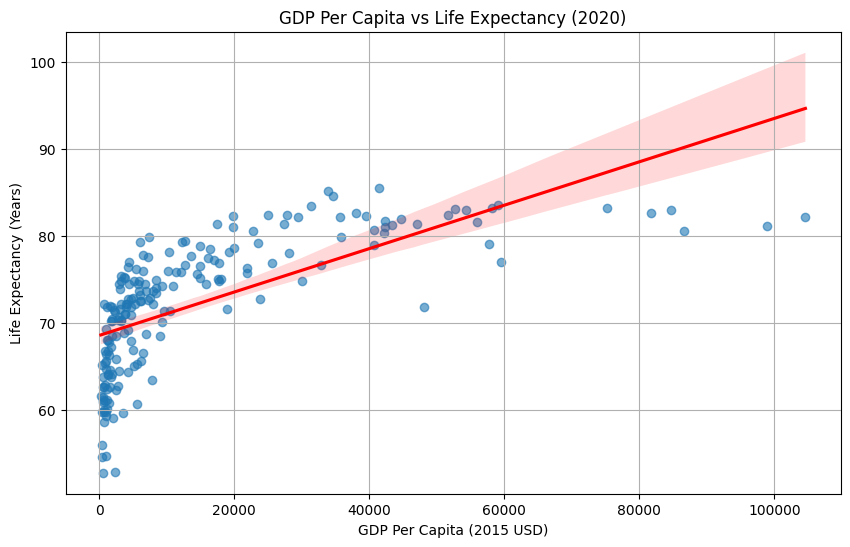

In [6]:
# -------------------------------
# 3. Scatterplot with Regression Line: GDP Per Capita vs Life Expectancy
# -------------------------------

# Only rows with both GDP and Life Expectancy
scatter_data = df_2020.dropna(subset=['GDP_Per_Capita_2015_USD', 'Life_Expectancy_Total'])

# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.regplot(
    data=scatter_data,
    x='GDP_Per_Capita_2015_USD',
    y='Life_Expectancy_Total',
    scatter_kws={'alpha':0.6},
    line_kws={'color':'red'}
)
plt.title('GDP Per Capita vs Life Expectancy (2020)')
plt.xlabel('GDP Per Capita (2015 USD)')
plt.ylabel('Life Expectancy (Years)')
plt.grid(True)
plt.show()


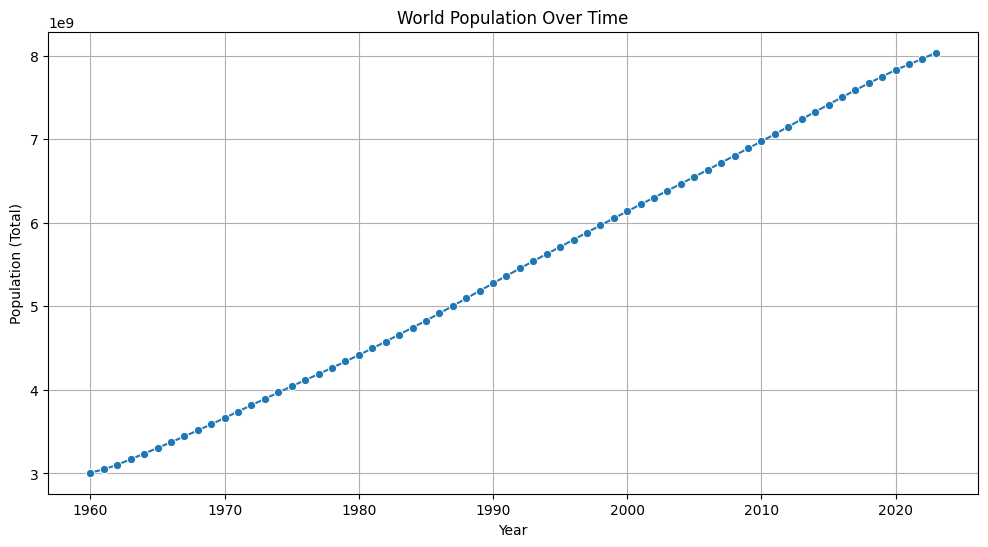

In [7]:

# -------------------------------
# 4. Time-Series Chart: World Population Over Time
# -------------------------------

# Group by Year and sum population
pop_over_time = df.groupby('Year')['Population_Total'].sum().reset_index()

# Drop missing population years
pop_over_time = pop_over_time.dropna()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=pop_over_time,
    x='Year',
    y='Population_Total',
    marker='o'
)
plt.title('World Population Over Time')
plt.xlabel('Year')
plt.ylabel('Population (Total)')
plt.grid(True)
plt.show()